In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
pip install PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':"1B_o2LGn29DZuZky7txAvAHBZerYvlcnj"})
downloaded.GetContentFile('household_power_consumption.txt')

In [0]:
df=pd.read_csv('household_power_consumption.txt',parse_dates={'DateTime':['Date','Time']},
               sep=';',infer_datetime_format=True,low_memory=False,na_values=['nan','?'],
               index_col='DateTime')

In [0]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


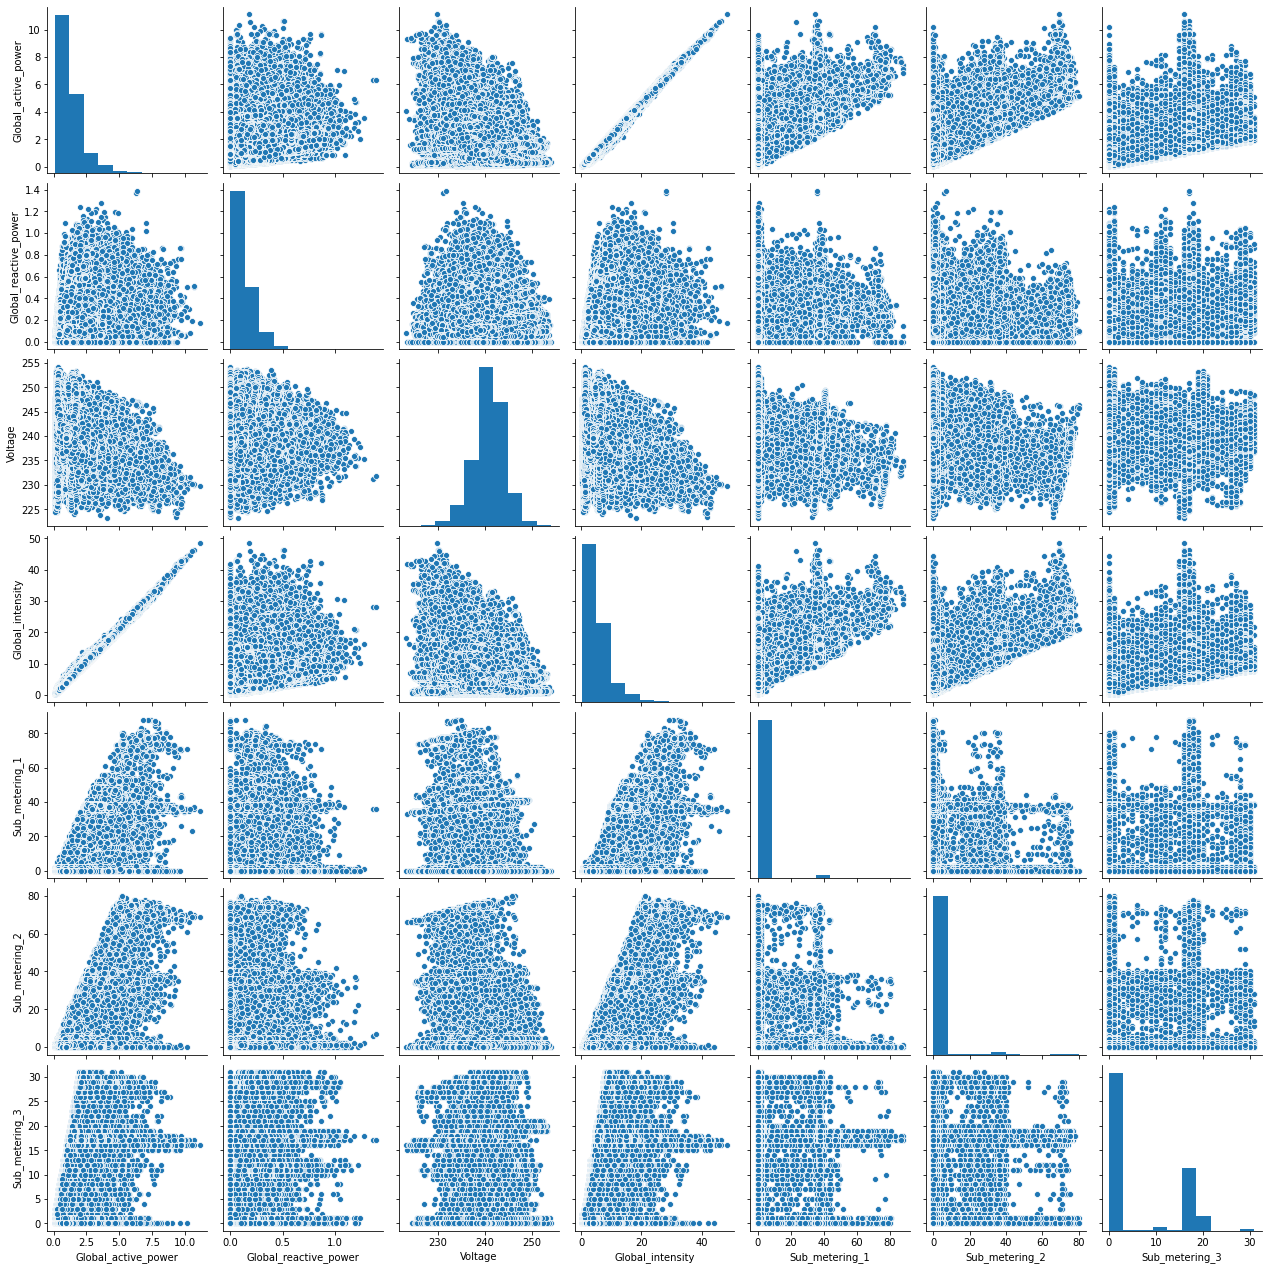

In [0]:
sns.pairplot(df)

In [0]:
values = df.values.astype('float32')
df['Sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

# Create figure and plot space
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(df.index.values,
       df['Global_active_power'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Global Active Power",)

plt.show()

In [0]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Sub_metering_4           25979
dtype: int64

In [0]:
df['Global_active_power'].fillna(df['Global_active_power'].mean(),inplace=True)
df['Global_reactive_power'].fillna(df['Global_reactive_power'].mean(),inplace=True)
df['Voltage'].fillna(df['Voltage'].mean(),inplace=True)
df['Global_intensity'].fillna(df['Global_intensity'].mean(),inplace=True)
df['Sub_metering_1'].fillna(df['Sub_metering_1'].mean(),inplace=True)
df['Sub_metering_2'].fillna(df['Sub_metering_2'].mean(),inplace=True)
df['Sub_metering_3'].fillna(df['Sub_metering_3'].mean(),inplace=True)
df['Sub_metering_4'].fillna(df['Sub_metering_4'].mean(),inplace=True)

In [0]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Sub_metering_4           0
dtype: int64

Text(0.5, 1.0, 'Global Active Power')

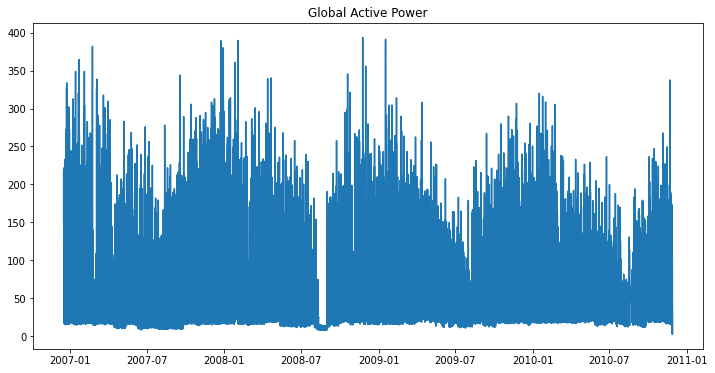

In [0]:
plt.figure(figsize=(12,6))
plt.subplot()
plt.plot(df['Global_active_power'].resample('1H').sum())
plt.title('Global Active Power')

Text(0.5, 1.0, 'Global Reactive Power')

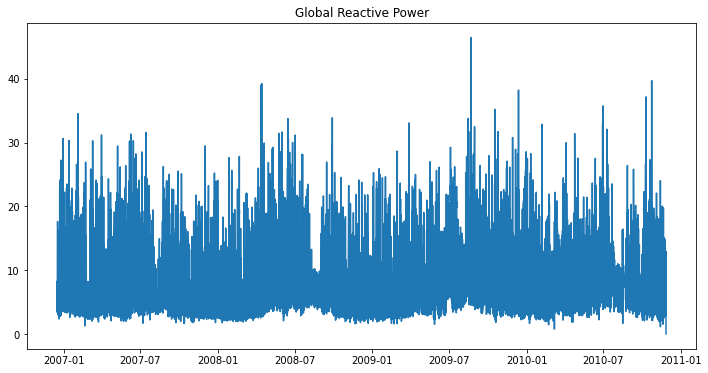

In [0]:
plt.figure(figsize=(12,6))
plt.subplot()
plt.plot(df['Global_reactive_power'].resample('1H').sum())
plt.title('Global Reactive Power')

Text(0.5, 1.0, 'Voltage')

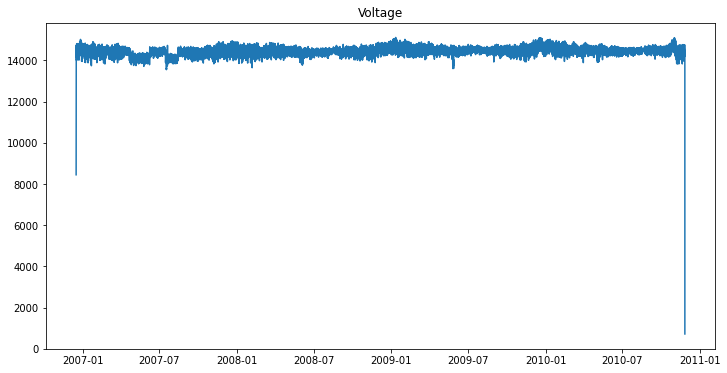

In [0]:
plt.figure(figsize=(12,6))
plt.subplot()
plt.plot(df['Voltage'].resample('1H').sum())
plt.title('Voltage')

Text(0.5, 1.0, 'Intensity')

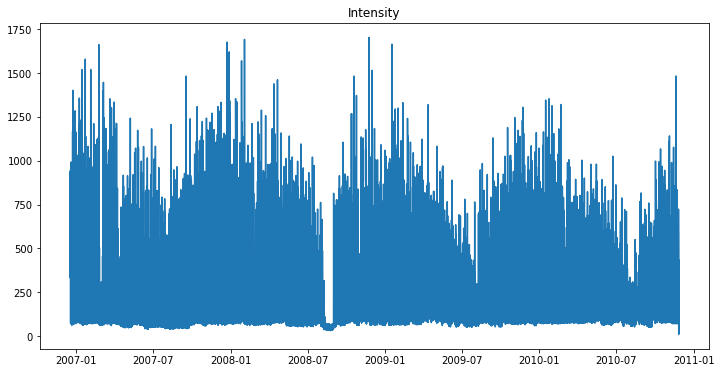

In [0]:
plt.figure(figsize=(12,6))
plt.subplot()
plt.plot(df['Global_intensity'].resample('1H').sum())
plt.title('Intensity')

Text(0.5, 1.0, 'Sub Metering 1')

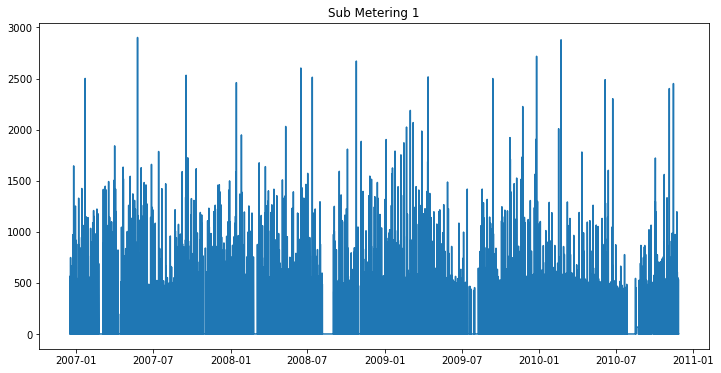

In [0]:
plt.figure(figsize=(12,6))
plt.subplot()
plt.plot(df['Sub_metering_1'].resample('1H').sum())
plt.title('Sub Metering 1')

Text(0.5, 1.0, 'Sub Metering 2')

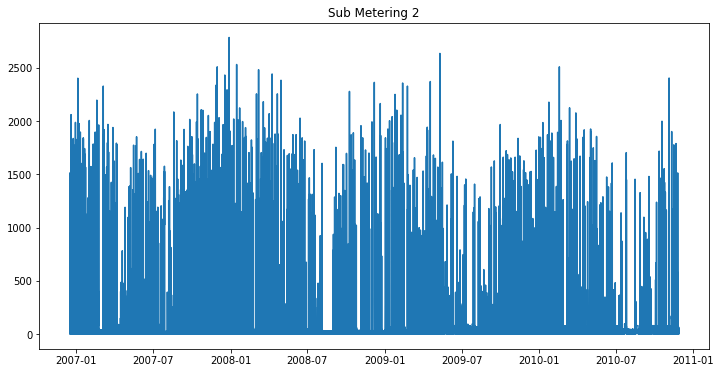

In [0]:
plt.figure(figsize=(12,6))
plt.subplot()
plt.plot(df['Sub_metering_2'].resample('1H').sum())
plt.title('Sub Metering 2')

Text(0.5, 1.0, 'Sub Metering 3')

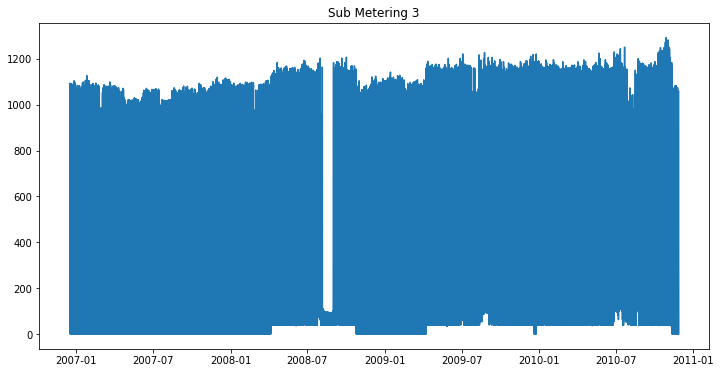

In [0]:
plt.figure(figsize=(12,6))
plt.subplot()
plt.plot(df['Sub_metering_3'].resample('1H').sum())
plt.title('Sub Metering 3')

Text(0.5, 1.0, 'Sub Metering 4')

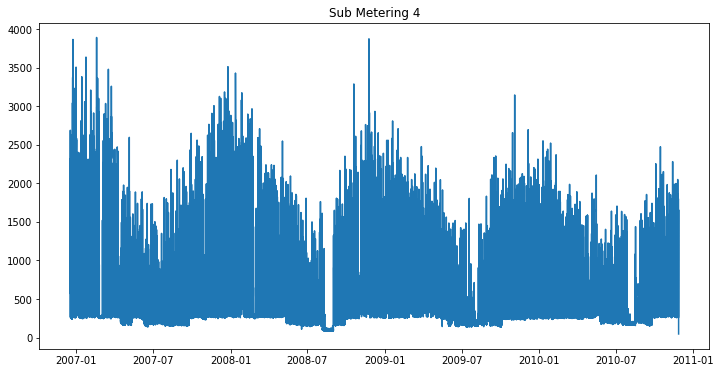

In [0]:
plt.figure(figsize=(12,6))
plt.subplot()
plt.plot(df['Sub_metering_4'].resample('1H').sum())
plt.title('Sub Metering 4')

In [0]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,0.701380
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.211624
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.271371
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,0.703258
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,0.125067
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,0.085201
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.178724
Sub_metering_4,0.701380,0.211624,-0.271371,0.703258,0.125067,0.085201,0.178724,1.000000


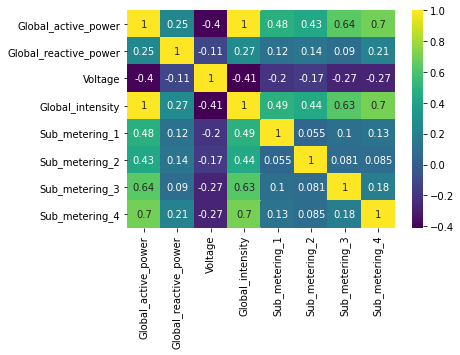

In [0]:
sns.heatmap(df.corr(),cmap='viridis',annot=True)

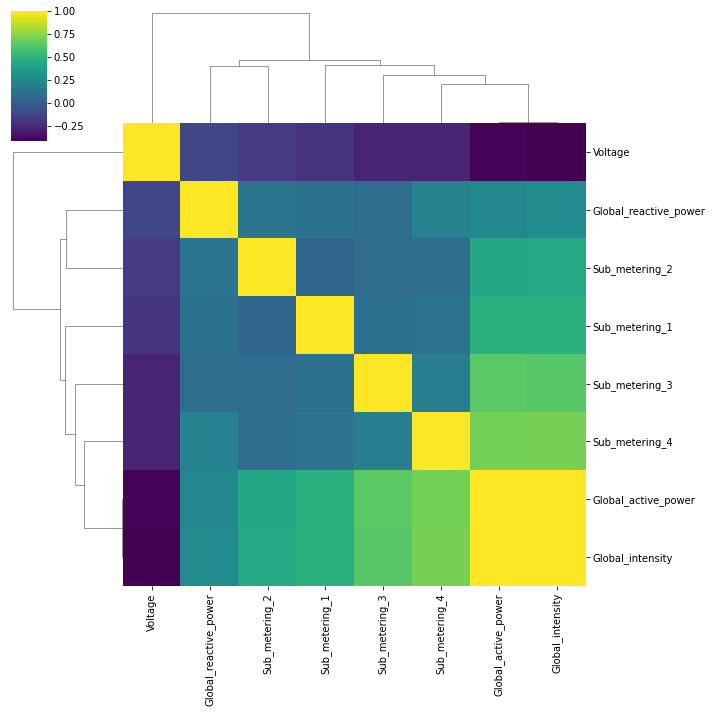

In [0]:
sns.clustermap(df.corr(),cmap='viridis')

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Global_active_power',axis=1),df['Global_active_power'],test_size=0.3)

In [0]:
lm=LinearRegression().fit(X_train,y_train)

In [0]:
pred=lm.predict(X_test)

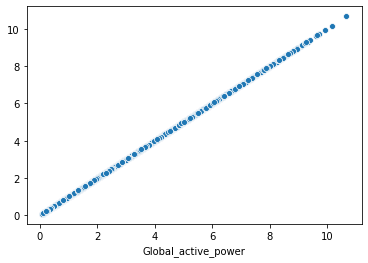

In [0]:
sns.scatterplot(x=y_test,y=pred)

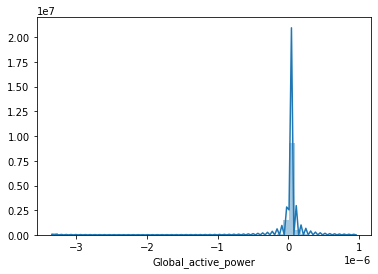

In [0]:
sns.distplot(y_test-pred,bins=50)